In [5]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()
training_images = training_images / 255
test_images = test_images / 255
training_images = training_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [6]:
model.fit(training_images, training_labels, epochs= 5)
test_loss = model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4299 - accuracy: 0.8443
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2897 - accuracy: 0.8934
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2445 - accuracy: 0.9094
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2124 - accuracy: 0.9208
Epoch 5/5
313/313 [==============================] - 3s 3ms/step - loss: 0.2665 - accuracy: 0.9021


In [9]:
import matplotlib.pyplot as plt
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs=model.input, outputs = layer_outputs)
pred = activation_model.predict(test_images[0].reshape(1,28,28,1))

1/1 [==============================] - 0s 138ms/step


In [18]:
pred[0].shape

(1, 26, 26, 64)

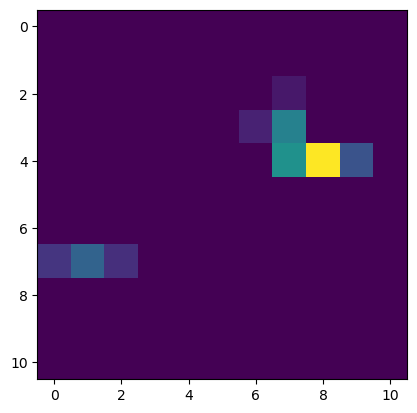

In [25]:
plt.imshow(pred[2][0,:,:,1])